<a href="https://colab.research.google.com/github/ou12ma/mvc/blob/main/LLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import plotly.graph_objects as go

n,d: 1000 100


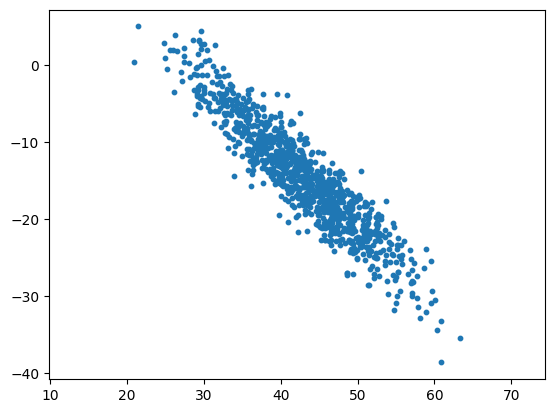

In [ ]:
# Load the data
mat_ellips = scipy.io.loadmat('ellipsoide_standardpca.mat')
X_ellips = mat_ellips['X']
n = X_ellips.shape[0]
d = X_ellips.shape[1]
print('n,d:',n,d)

# Plot the data
plt.scatter(X_ellips[:, 0], X_ellips[:, 1], s=10)
plt.axis('equal')
plt.show()

In [ ]:
# Perform LLE with 2 components
lle_ellips = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_ellips_lle = lle_ellips.fit_transform(X_ellips)
print('X_ellips_lle.shape:', X_ellips_lle.shape)



X_ellips_lle.shape: (1000, 2)


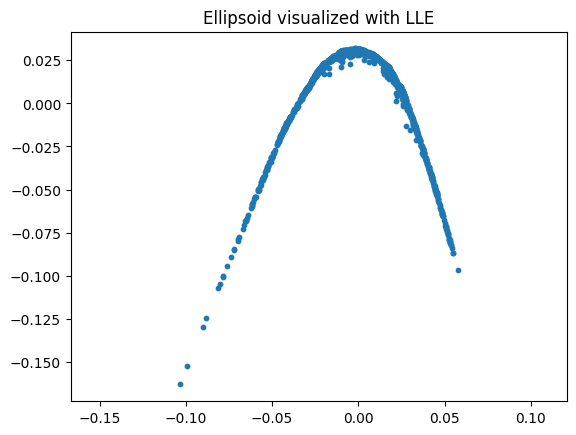

In [ ]:
# Plot the LLE-transformed data
plt.scatter(X_ellips_lle[:, 0], X_ellips_lle[:, 1], s=10)
plt.axis('equal')
plt.title("Ellipsoid visualized with LLE")
plt.show()

# **Swiss Roll**

In [ ]:
# Load the Swiss roll data
mat_roll = scipy.io.loadmat('swiss_roll.mat')
X_roll = mat_roll['X']
n, d = X_roll.shape
print('n,d:', n, d)


n,d: 2048 3


In [ ]:
# Perform LLE with 2 components
lle_roll = LocallyLinearEmbedding(n_neighbors=12, n_components=2)
X_roll_lle = lle_roll.fit_transform(X_roll)
print('X_roll_lle.shape:', X_roll_lle.shape)


X_roll_lle.shape: (2048, 2)


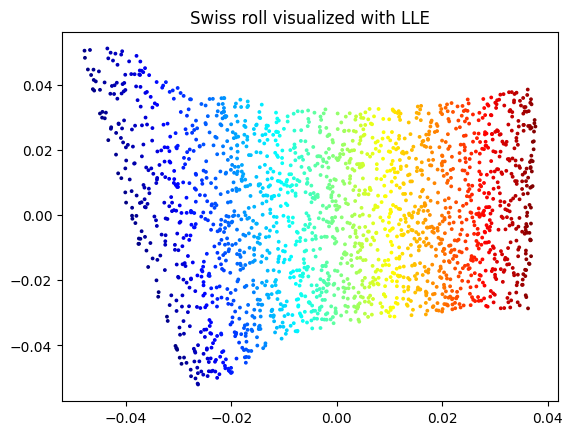

In [ ]:
# Plot the 2D LLE-transformed Swiss roll
plt.figure()
plt.scatter(X_roll_lle[:, 0], X_roll_lle[:, 1], c=Cgt_roll, s=3, cmap=plt.jet())  # Use plt.jet() instead of pyplot.jet()
plt.title("Swiss roll visualized with LLE")
plt.show()


In [ ]:
# Perform LLE with 3 components
lle_roll_3d = LocallyLinearEmbedding(n_neighbors=16,n_components=3)
X_roll_lle_3d = lle_roll_3d.fit_transform(X_roll)
print('X_roll_lle_3d.shape:', X_roll_lle_3d.shape)


X_roll_lle_3d.shape: (2048, 3)


In [ ]:
Cgt_roll = mat_roll['Cgt'].squeeze()
Ccolor_roll = ['rgb('+str(c[0]*255)+', '+str(c[1]*255)+', '+str(c[2]*255)+')' for c in Cgt_roll]

# 3D Plot for LLE-transformed Swiss roll
Xvis, Yvis, Zvis = X_roll_lle_3d[:, 0], X_roll_lle_3d[:, 1], X_roll_lle_3d[:, 2]
data = go.Scatter3d(x=Xvis, y=Yvis, z=Zvis, mode='markers', marker=dict(size=3, color=Ccolor_roll, colorscale='jet', opacity=1)) # data as points

# Create the figure
fig = go.Figure(data=[data])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30, pad=0)) # tight layout but t=25 required for showing title
fig.update_layout(autosize=False, width=600, height=600, title_text="Swiss roll visualized with LLE")

fig.update_layout(scene = dict(zaxis = dict(showgrid = True, showticklabels = False), zaxis_title = ' ') ) # no range values, no axis name, grid on
fig.update_layout(scene = dict(yaxis = dict(showgrid = True, showticklabels = False), yaxis_title = ' ') ) # no range values, no axis name, grid on
fig.update_layout(scene = dict(xaxis = dict(showgrid = True, showticklabels = False), xaxis_title = ' ') ) # no range values, no axis name, grid on
fig.layout.scene.aspectratio = {'x':1, 'y':1, 'z':1}

# Show the figure
fig.show()


# **MNIST**

Shape of LLE output: (10000, 2)


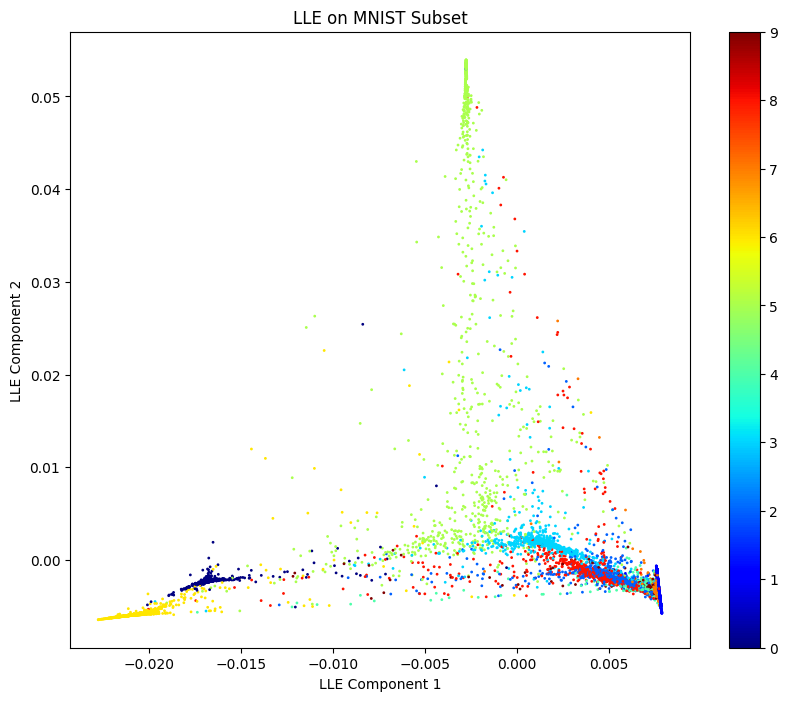

In [ ]:
import scipy.io
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Load the MNIST data
mat_mnist = scipy.io.loadmat('MNIST_data.mat')
X_mnist = mat_mnist['X']
C_mnist = mat_mnist['C'].squeeze()

# Select a smaller subset of the data for testing
X_mnist_subset = X_mnist[:10000]
C_mnist_subset = C_mnist[:10000]

# Perform LLE with reduced neighbors
lle_mnist = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_mnist_lle = lle_mnist.fit_transform(X_mnist_subset)

# Check the shape of the output
print('Shape of LLE output:', X_mnist_lle.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X_mnist_lle[:, 0], X_mnist_lle[:, 1], c=C_mnist_subset, s=1, cmap='jet')
plt.title('LLE on MNIST Subset')
plt.colorbar()
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()


In [ ]:
# Perform LLE with 3 components
lle_3d_mnist = LocallyLinearEmbedding(n_neighbors=16, n_components=3)
X_mnist_lle_3d = lle_3d_mnist.fit_transform(X_mnist)
print('X_mnist_lle_3d.shape:', X_mnist_lle_3d.shape)

In [ ]:
import plotly.graph_objects as go
# 3D Plot for MNIST
Xvis, Yvis, Zvis = X_mnist_lle_3d[:, 0], X_mnist_lle_3d[:, 1], X_mnist_lle_3d[:, 2]
data = go.Scatter3d(x=Xvis, y=Yvis, z=Zvis, mode='markers', marker=dict(size=2, color=C_mnist, colorscale='jet', opacity=1))
fig = go.Figure(data=[data])
fig.update_layout(autosize=False, width=600, height=600, title_text="MNIST visualized with LLE")
fig.show()


NameError: name 'X_mnist_lle_3d' is not defined